# **Modeling the Neutrino Induced Scale Dependent Bias**

In [17]:
# Import standard libraries
import numpy as np
import matplotlib.pyplot as plt
import camb
from camb import model

### Setting the cosmology

In [ ]:
# Cosmological parameters
# Neutrino mass
Mnu = 0.5
# Linear bias
b1 = 1.98 #1.645
# Hubble
h = 0.6736
# Baryons
omega_b = 0.02237
# Cold Dark Matter
omega_cdm = 0.1200
# Scalar spectral index
ns = 0.9649
# Scalar amplitude
log10As = np.log(1e10*2.0830e-9)

# Settings
# Redshift
zeff = 0.8
# kmax mode
kmax = 0.5

### Initializing CAMB

In [19]:
pars = camb.CAMBparams()
pars.set_cosmology(H0=h*100, ombh2=omega_b, omch2=omega_cdm, omk=0.0, 
                    tau=0.0561, standard_neutrino_neff=3.04, num_massive_neutrinos=1, 
                    neutrino_hierarchy='normal', mnu=Mnu, nnu=3.04)
pars.InitPower.set_params(ns=ns, As=np.exp(log10As)/1e10)
pars.set_matter_power(kmax=kmax, redshifts=[zeff, zeff + 0.001])
results = camb.get_results(pars)

Note: redshifts have been re-sorted (earliest first)


### Computing the linear power spectrum

In [20]:
# Get Power spectrum of matter
kh, _, PK = results.get_linear_matter_power_spectrum(hubble_units=True, k_hunit=True)
Pk = PK[0,:]
Pk_z2 = PK[1,:]
# Get Power spectrum of baryons+CDM at the two redshift (for computing the growth rate f_cb(k) later)
_, _, PK_cb = results.get_linear_matter_power_spectrum(var1='delta_nonu', var2='delta_nonu', hubble_units=True, k_hunit=True)
Pk_cb = PK_cb[0,:]
Pk_cb_z2 = PK_cb[1,:]

### Computing the matter transfer functions

In [21]:
trans = results.get_matter_transfer_data()

T_c = trans.transfer_data[model.Transfer_cdm-1,:,1]
T_b = trans.transfer_data[model.Transfer_b-1,:,1]
T_nu = trans.transfer_data[model.Transfer_nu-1,:,1]
T_m = trans.transfer_data[model.Transfer_tot-1,:,0]
T_cb = trans.transfer_data[model.Transfer_nonu-1,:,0]

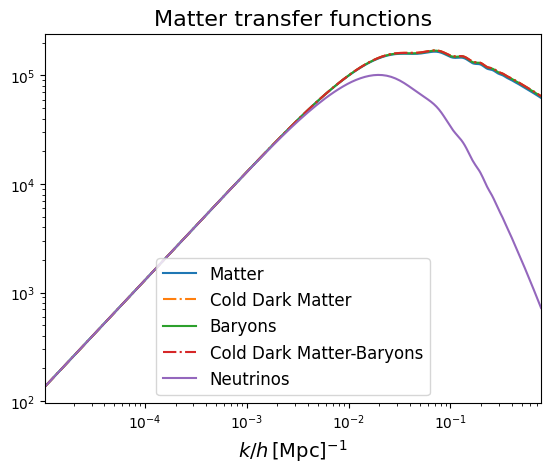

In [22]:
plt.plot(kh,T_m*kh)
plt.plot(kh,T_c*kh, ls='-.')
plt.plot(kh,T_b*kh)
plt.plot(kh,T_cb*kh, ls='-.')
plt.plot(kh,T_nu*kh)
plt.xscale('log')
plt.yscale('log')
plt.xlim(np.min(kh),np.max(kh))
plt.xlabel(r'$k/h\, [\rm Mpc]^{-1}$', fontsize=14)
plt.title('Matter transfer functions', fontsize=16)
plt.legend([r'Matter',r'Cold Dark Matter', r'Baryons', r'Cold Dark Matter-Baryons', r'Neutrinos'], fontsize=12);

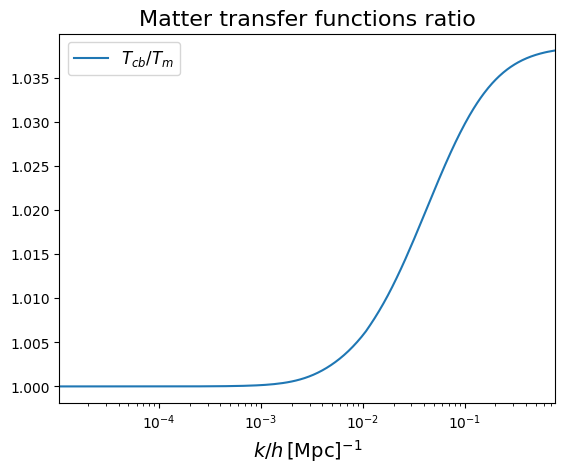

In [24]:
plt.plot(kh,T_cb/T_m)
plt.xscale('log')
plt.xlim(np.min(kh),np.max(kh))
plt.xlabel(r'$k/h\, [\rm Mpc]^{-1}$', fontsize=14)
plt.title('Matter transfer functions ratio', fontsize=16)
plt.legend([r'$T_{cb}/T_{m}$'], fontsize=12);

# Bias correction

## 1.- Bias correction in the absence of RSD

### The linear bias will become:
### $$ b_m = b_1 \hspace{1 cm} \longrightarrow \hspace{1 cm} b_m(k, M_{\nu}) = b_{cb}(k)\frac{T_{cb}(k, M_{\nu})}{T_{m}(k, M_{\nu})}. $$

In [25]:
bm = b1*(T_cb/T_m)

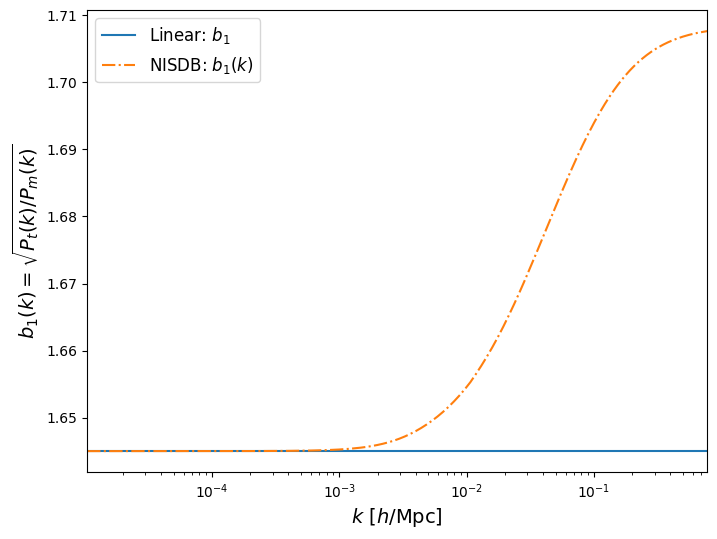

In [26]:
fig, axs = plt.subplots(figsize=(8, 6))
axs.plot(kh, np.full(len(kh), b1), label=r'Linear: $b_1$')
axs.plot(kh, bm, label=r'NISDB: $b_1(k)$', ls = '-.')
# axs.set_xlim(1e-3,0.1)
plt.xlim(np.min(kh),np.max(kh))
axs.set_xscale('log')
axs.set_xlabel('$k$ [$h$/Mpc]', fontsize=14)
axs.set_ylabel(r'$b_1(k) = \sqrt{P_{t}(k) /P_{m}(k)}$', fontsize=14)
legend = axs.legend(prop={'size': 12})
plt.show()

### The linear matter power spectrum will be related to the tracers spectrum:

### $$ P_t(k, M_{\nu}) = b_{cb}^{2}(k)\left( \frac{T_{cb}(k, M_{\nu})}{T_{m}(k, M_{\nu})} \right)^{2} P_m(k, M_{\nu}). $$

In [27]:
# Tracers power spectrum
Pk_t = b1**2*Pk
# Tracers NISDB power spectrum
Pk_t_NISDB = bm**2*Pk

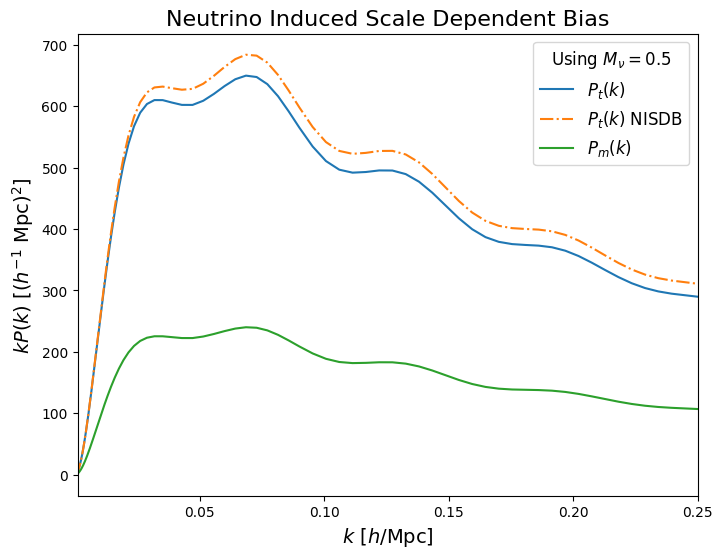

In [28]:
fig, axs = plt.subplots(figsize=(8, 6))
axs.plot(kh, kh*Pk_t, label=r'$P_t(k)$')
axs.plot(kh, kh*Pk_t_NISDB, label=r'$P_t(k)$ NISDB', ls='-.')
axs.plot(kh, kh*Pk, label=r'$P_m(k)$')
axs.set_xlim(1e-3,0.25)
axs.set_xlabel('$k$ [$h$/Mpc]', fontsize=14)
axs.set_ylabel('$kP(k)$ [($h^{-1}$ Mpc)$^2$]', fontsize=14)
axs.legend(prop={'size': 12}, title= fr'Using $ M_{{\nu}} = {Mnu} $', title_fontsize=12)
axs.set_title(fr'Neutrino Induced Scale Dependent Bias', fontsize=16)
plt.show()

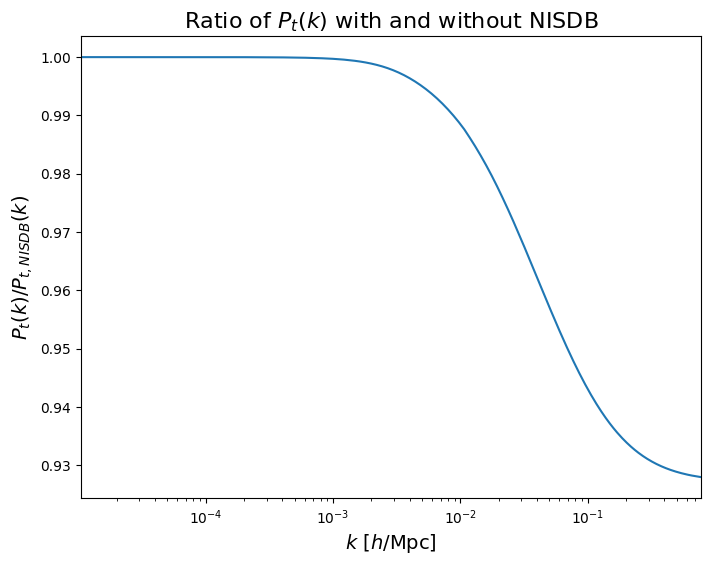

In [29]:
fig, axs = plt.subplots(figsize=(8, 6))
axs.plot(kh, Pk_t/Pk_t_NISDB)
axs.set_xscale('log')
plt.xlim(np.min(kh),np.max(kh))
axs.set_xlabel('$k$ [$h$/Mpc]', fontsize=14)
axs.set_ylabel('$P_t(k) / P_{t,NISDB}(k)$', fontsize=14)
axs.set_title(fr'Ratio of $P_t(k)$ with and without NISDB', fontsize=16)
plt.show()

## 2.- The impact of RSD

### The linear power spectrum will become:
### $$ P_t(k, \mu) = \left( b_m(k, M_{\nu}) + f^{\text{eff}}_m(k, M_{\nu}) \mu^2 \right)^2 P_m(k), $$
### where: 
### $$ f^{\text{eff}}_m(k, M_{\nu}) \equiv f_{cb}(k)\frac{T_{cb}(k, M_{\nu})}{T_{m}(k, M_{\nu})} \hspace{1 cm} \& \hspace{1 cm}  f_{cb}(k) \equiv \frac{d \ln \left( \sqrt{P_{cb}(k)} \right)}{d \ln a}. $$

In [30]:
# Computing f_cb(k) around z = zeff
a1 = 1.0 / (1.0 + zeff)
a2 = 1.0 / (1.0 + zeff + 0.001)
dlnP = np.log(Pk_cb_z2) - np.log(Pk_cb)
dln_a = np.log(a2) - np.log(a1)
f_cb = 0.5 * dlnP / dln_a
# Computing f_m(k) around z = zeff
dlnP = np.log(Pk_z2) - np.log(Pk)
dln_a = np.log(a2) - np.log(a1)
f_m = 0.5 * dlnP / dln_a
# Get the effective growth rate with respect to the total matter
f_eff = f_cb*(T_cb / T_m)
# Define mu values
mu_vals = np.linspace(-1, 1, len(Pk))
# Computing the power spectrum with RSDs
# For the standard case
P_k_mu = np.array([(b1 + f_m * mu_i**2)**2 * Pk for mu_i in mu_vals])
P_k_mu =  P_k_mu.T
# For the NISDB
P_k_mu_NISDB = np.array([(bm + f_eff * mu_i**2)**2 * Pk for mu_i in mu_vals])
P_k_mu_NISDB =  P_k_mu_NISDB.T

### Written in terms of a multipole expansion:
### $$ P_{\ell}(k) = \frac{2\ell + 1}{2} \int_{-1}^{1} d\mu \, P_t(k, \mu) \mathcal{L}_{\ell}(\mu). $$

In [31]:
def get_multipoles(P_k_mu):
    mu_vals = np.linspace(-1, 1, P_k_mu.shape[1])  # Ensure match with P_k_mu's shape
    # Define Legendre polynomials of Legendre
    def L0(mu):
        return np.ones_like(mu)
    def L2(mu):
        return 0.5 * (3 * mu**2 - 1)
    def L4(mu):
        return (35 * mu**4 - 30 * mu**2 + 3) / 8
    # Compute Legendre polynomials
    L_ell0 = L0(mu_vals)
    L_ell2 = L2(mu_vals)
    L_ell4 = L4(mu_vals)
    # Multiply each row in P_k_mu by the Legendre polynomials
    integrand0 = P_k_mu * L_ell0[np.newaxis, :]
    integrand2 = P_k_mu * L_ell2[np.newaxis, :]
    integrand4 = P_k_mu * L_ell4[np.newaxis, :]
    # Integrate over μ using trapezoidal rule along axis=1 (μ-axis)
    integral0 = np.trapz(integrand0, x=mu_vals, axis=1)
    integral2 = np.trapz(integrand2, x=mu_vals, axis=1)
    integral4 = np.trapz(integrand4, x=mu_vals, axis=1)
    # Multipole prefactors
    P_ell0 = 0.5 * integral0
    P_ell2 = 2.5 * integral2
    P_ell4 = 4.5 * integral4
    return P_ell0, P_ell2, P_ell4

P_ell0, P_ell2, P_ell4 = get_multipoles(P_k_mu)
P_ell0_NISDB, P_ell2_NISDB, P_ell4_NISDB = get_multipoles(P_k_mu_NISDB)

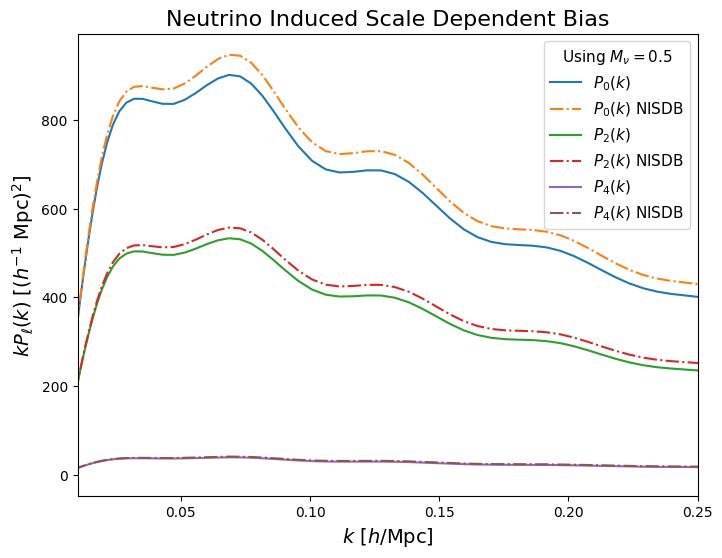

In [35]:
fig, axs = plt.subplots(figsize=(8, 6))
axs.plot(kh, kh*P_ell0, label=r'$P_0(k)$')
axs.plot(kh, kh*P_ell0_NISDB, label=r'$P_0(k)$ NISDB', ls='-.')
axs.plot(kh, kh*P_ell2, label=r'$P_2(k)$')
axs.plot(kh, kh*P_ell2_NISDB, label=r'$P_2(k)$ NISDB', ls='-.')
axs.plot(kh, kh*P_ell4, label=r'$P_4(k)$')
axs.plot(kh, kh*P_ell4_NISDB, label=r'$P_4(k)$ NISDB', ls='-.')
axs.set_xlim(0.01,0.25)
axs.set_xlabel('$k$ [$h$/Mpc]', fontsize=14)
axs.set_ylabel(r'$kP_{\ell}(k)$ [($h^{-1}$ Mpc)$^2$]', fontsize=14)
axs.legend(prop={'size': 11}, title= fr'Using $ M_{{\nu}} = {Mnu} $', title_fontsize=11)
axs.set_title(fr'Neutrino Induced Scale Dependent Bias', fontsize=16)
plt.show()